<a href="https://colab.research.google.com/github/ifky06/PCVK/blob/main/Praktikum7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ahmad Rifki Fauzi**
# **TI-3B/04**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from PIL import Image as im

In [ ]:
def convolution2d(image, kernel, stride, padding):

    image = np.pad(image, pad_width=padding, mode='constant', constant_values=0)

    # mengambil ukuran dari citra dan kernel
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape

    # menghitung ukuran dari citra hasil konvolusi
    output_row = int((image_row - kernel_row + 2 * padding) / stride) + 1
    output_col = int((image_col - kernel_col + 2 * padding) / stride) + 1

    # jika padding tidak digunakan, maka padding = 0
    if padding == 0:
        pad = 0
    else:
        pad = padding

    # membuat matriks kosong untuk citra hasil konvolusi
    output = np.zeros((output_row, output_col))

    # melakukan konvolusi
    for row in range(output_row):
        for col in range(output_col):
            # mengambil bagian dari citra sesuai dengan ukuran kernel
            image_part = image[row * stride:row * stride + kernel_row, col * stride:col * stride + kernel_col]
            # memastikan ukuran image_part sesuai dengan kernel
            if image_part.shape == kernel.shape:
                # menghitung nilai konvolusi
                output[row, col] = np.sum(image_part * kernel)

    return output

In [ ]:
img = cv.imread('images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [ ]:
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    kernel = np.exp(-((x**2 + y**2) / (2.0 * sigma**2))) * normal
    return kernel

kernel_average = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9
kernel_low_pass = np.array([[1, 1, 1], [1, 2, 1], [1, 1, 1]]) / 10
kernel_high_pass = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
kernel_emboss = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
kernel_left_sobel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
kernel_canny = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
kernel_prewitt = np.array([[1, -1, -1], [0, 0, 0], [1, 1, 1]])
kernel_gaussian = np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, 36, 24, 6], [4, 16, 24, 16, 4], [1, 4, 6, 4, 1]])
kernel_gaussian_21 = gaussian_kernel(21, 5)



In [ ]:
img_conv_average = convolution2d(img_gray, kernel_average, 1, 2)
img_conv_low_pass = convolution2d(img_gray, kernel_low_pass, 1, 2)
img_conv_high_pass = convolution2d(img_gray, kernel_high_pass, 1, 2)
img_conv_sharpen = convolution2d(img_gray, kernel_sharpen, 1, 2)
img_conv_emboss = convolution2d(img_gray, kernel_emboss, 1, 2)
img_conv_left_sobel = convolution2d(img_gray, kernel_left_sobel, 1, 2)
img_conv_canny = convolution2d(img_gray, kernel_canny, 1, 1)
img_conv_prewitt = convolution2d(img_gray, kernel_prewitt, 1, 2)
img_conv_gaussian = convolution2d(img_gray, kernel_gaussian, 1, 2)
img_conv_gaussian_21 = convolution2d(img_gray, kernel_gaussian_21, 1, 2)



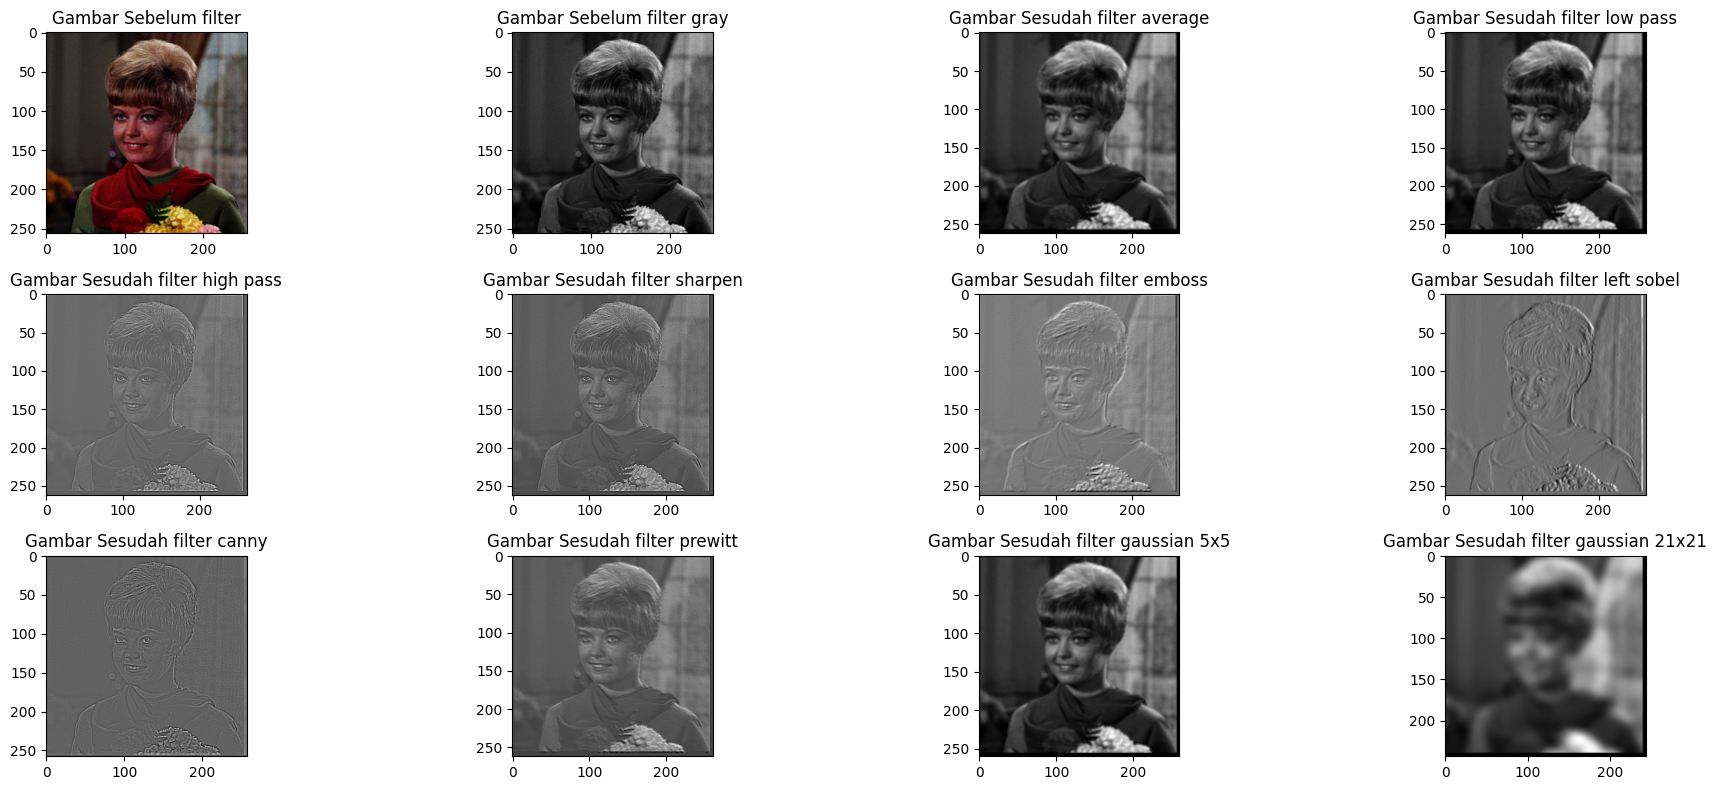

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))

plt.subplot(3, 4, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), cmap='gray')
plt.title('Gambar Sebelum filter')

plt.subplot(3, 4, 2)
plt.imshow(img_gray, cmap='gray')
plt.title('Gambar Sebelum filter gray')

plt.subplot(3, 4, 3)
plt.imshow(img_conv_average, cmap='gray')
plt.title('Gambar Sesudah filter average')

plt.subplot(3, 4, 4)
plt.imshow(img_conv_low_pass, cmap='gray')
plt.title('Gambar Sesudah filter low pass')

plt.subplot(3, 4, 5)
plt.imshow(img_conv_high_pass, cmap='gray')
plt.title('Gambar Sesudah filter high pass')

plt.subplot(3, 4, 6)
plt.imshow(img_conv_sharpen, cmap='gray')
plt.title('Gambar Sesudah filter sharpen')

plt.subplot(3, 4, 7)
plt.imshow(img_conv_emboss, cmap='gray')
plt.title('Gambar Sesudah filter emboss')

plt.subplot(3, 4, 8)
plt.imshow(img_conv_left_sobel, cmap='gray')
plt.title('Gambar Sesudah filter left sobel')

plt.subplot(3, 4, 9)
plt.imshow(img_conv_canny, cmap='gray')
plt.title('Gambar Sesudah filter canny')

plt.subplot(3, 4, 10)
plt.imshow(img_conv_prewitt, cmap='gray')
plt.title('Gambar Sesudah filter prewitt')

plt.subplot(3, 4, 11)
plt.imshow(img_conv_gaussian, cmap='gray')
plt.title('Gambar Sesudah filter gaussian 5x5')

plt.subplot(3, 4, 12)
plt.imshow(img_conv_gaussian_21, cmap='gray')
plt.title('Gambar Sesudah filter gaussian 21x21')

plt.tight_layout()  # Ensure proper spacing
plt.show()
